<a href="https://colab.research.google.com/github/tcarlson123/SeniorProject/blob/main/Senior_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Senior Project**

# **Data Import**

In [10]:
import pandas as pd
from google.colab import drive
#we need to import dataset from local Google Drive, as its too large to be
#searched on GitHub
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SeniorProjectFile/data/data.csv'

df = pd.read_csv(file_path, delimiter=';')  #fixes the display of the data
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## **Data Prep**

###Data separation as x and y to focus on GDP

In [11]:
X = df[['GDP']]
y = df['Target']



In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))




{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


### Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

In [14]:
#This shows the real value for Graduate, Dropout, and Enrolled from the data set
print(df['Target'].value_counts())

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [15]:
from imblearn.over_sampling import SMOTE

#Used to randomize the dataset

smote = SMOTE(random_state=100)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=100)

#RandomForestClassifier Modeling

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       264
    Enrolled       0.00      0.00      0.00       164
    Graduate       0.52      1.00      0.68       457

    accuracy                           0.52       885
   macro avg       0.17      0.33      0.23       885
weighted avg       0.27      0.52      0.35       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


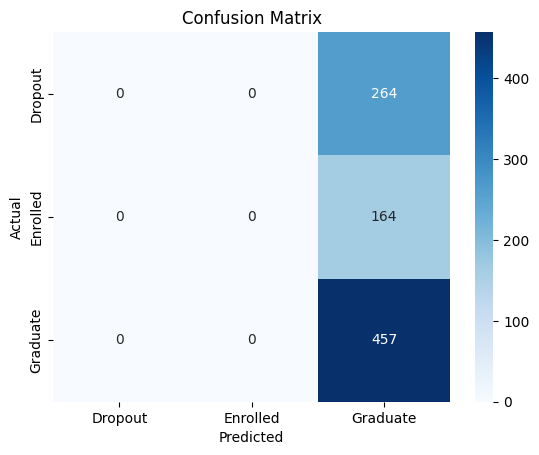

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix indicates that the GDP cannot be used as a strong enough indicator on its own to predict Dropout and Graduation rates. To ensure this was not solely a problem with the chosen modeling method, the data was graphed in both a boxplot as well as a scatterplot to check for correlation. The below scatterplot is fully randomized, indicating that GDP has little impact on its own on the graduate/dropout rate, rather than it being a modeling issue.

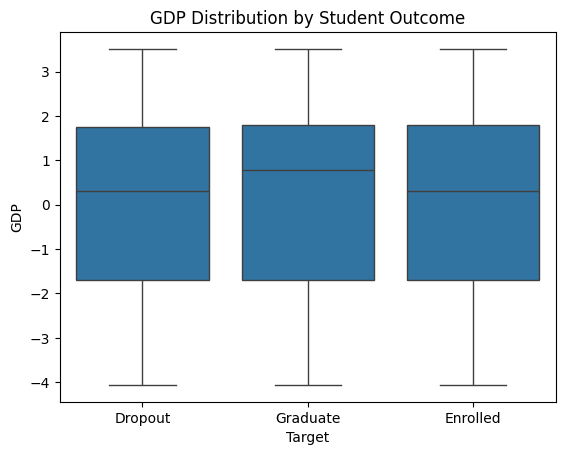

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Target'], y=df['GDP'])
plt.title('GDP Distribution by Student Outcome')
plt.show()


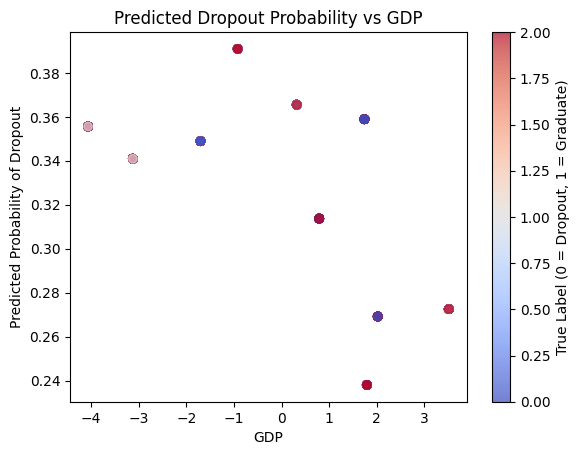

In [18]:
#predicted probabilities for dropout
y_pred_proba_dropout = clf.predict_proba(X_test)[:, 0]

# Plot GDP vs predicted dropout probability
plt.scatter(X_test, y_pred_proba_dropout, c=y_test, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='True Label (0 = Dropout, 1 = Graduate)')
plt.xlabel('GDP')
plt.ylabel('Predicted Probability of Dropout')
plt.title('Predicted Dropout Probability vs GDP')
plt.show()

#**Reprepping Data**##

In [20]:
#Creating a new dataframe using every numerical column in the csv
X = df.drop('Target', axis=1).select_dtypes(include='number')
y = df['Target']

#Encoding the 'Target' column to become numerical values

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


#Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

#RandomForestClassifier Modeling

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.83      0.76      0.79       264
    Enrolled       0.59      0.38      0.46       164
    Graduate       0.81      0.95      0.87       457

    accuracy                           0.79       885
   macro avg       0.74      0.70      0.71       885
weighted avg       0.77      0.79      0.77       885



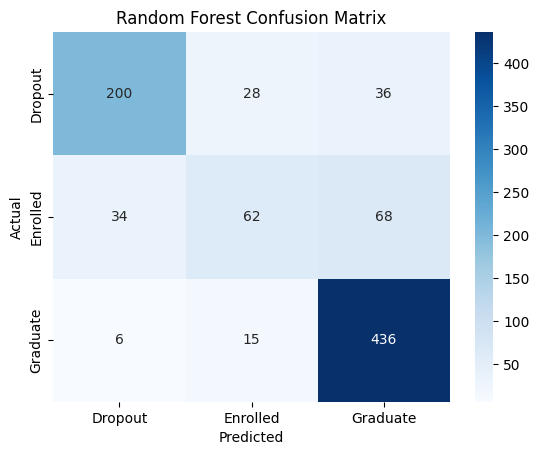

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

Now that we've switched our dataframe, the Confusion Matrix looks much better! Now we can use different modeling methods and see which is most accurate for this type of data set.

###DecisionTreeClassifier Modeling

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.64      0.67      0.66       264
    Enrolled       0.38      0.43      0.40       164
    Graduate       0.82      0.76      0.79       457

    accuracy                           0.67       885
   macro avg       0.61      0.62      0.62       885
weighted avg       0.68      0.67      0.68       885



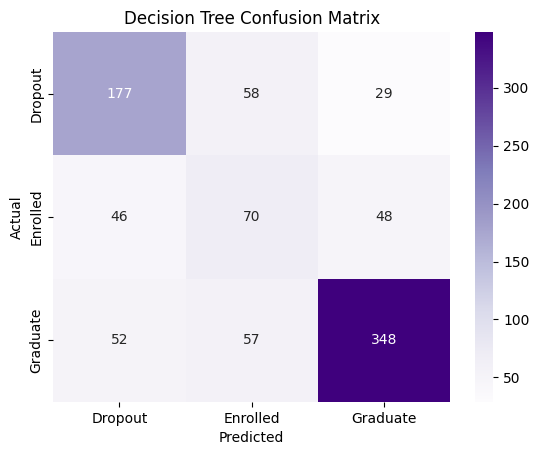

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

This modeling method is significantly less accurate than the Random Forest model, with an accuracy of 67% compared to the Random Forest Classifier's model which had a weighted average of 79%.

## Support Vector Classifier Modeling

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.81      0.77      0.79       264
    Enrolled       0.50      0.34      0.41       164
    Graduate       0.81      0.93      0.86       457

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.77      0.76       885



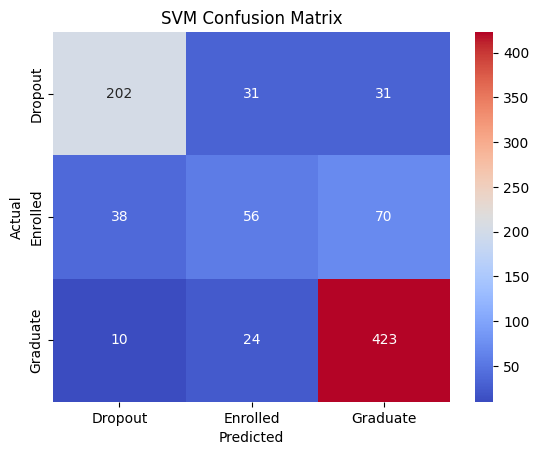

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
clf = SVC(kernel='linear', random_state=100)  # You can try 'rbf' or 'poly' as well
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

The SVM model yielded an accuracy metric of 77%, which didn't beat out the Random Forest's accuracy of 79%, however it did come close.

## Gaussian Naive Bayes

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.78      0.69      0.73       264
    Enrolled       0.40      0.29      0.33       164
    Graduate       0.74      0.86      0.80       457

    accuracy                           0.71       885
   macro avg       0.64      0.61      0.62       885
weighted avg       0.69      0.71      0.69       885



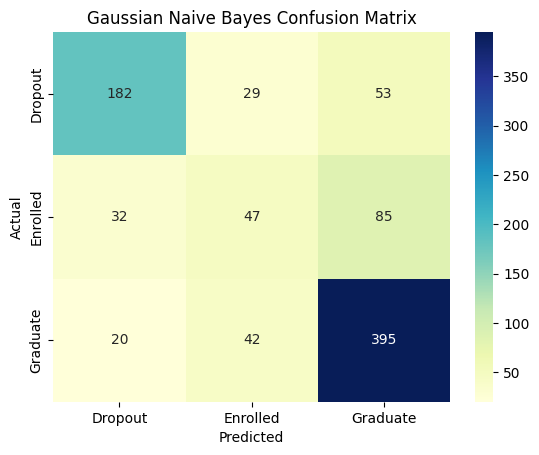

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

The Gaussian Naive Bayes model had an accuracy of 71%, which did not beat out the most accurate model being the Random Forest at 79% accuracy.

## K-Nearest Neighbors Classifier

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.79      0.67      0.72       264
    Enrolled       0.35      0.27      0.31       164
    Graduate       0.73      0.86      0.79       457

    accuracy                           0.69       885
   macro avg       0.62      0.60      0.61       885
weighted avg       0.68      0.69      0.68       885



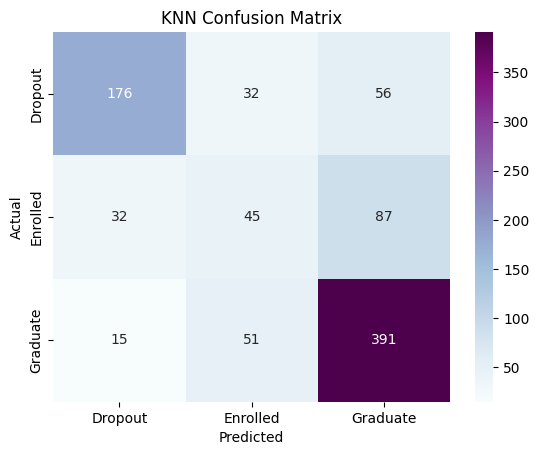

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the features (KNN is distance-based, so this is critical)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
clf = KNeighborsClassifier(n_neighbors=5)  # You can tune this later
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

The K-Nearest Neighbors Model had an accuracy of 69%, which did not beat out the most accurate model, being the Random Forest Classifier with an accuracy of 79%.

# Determining Whether Specific Variables Have a Large Impact on the Graduation Rate

Now that we've determined that the Random Forest Classifier is the best fit for our data set, we can use this model type to fit the data to specifics variables, such as the GDP done at the beginning.

## Nationality

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       264
    Enrolled       0.00      0.00      0.00       164
    Graduate       0.52      1.00      0.68       457

    accuracy                           0.51       885
   macro avg       0.17      0.33      0.23       885
weighted avg       0.27      0.51      0.35       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


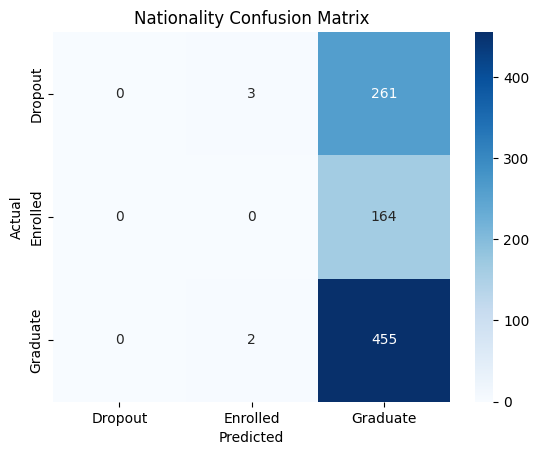

In [28]:
X = df[['Nacionality']]
y = df['Target']

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Nationality Confusion Matrix')
plt.show()


Nationality does not appear predictive for graduation rates, resulting in the model defaulting to the most frequent class, being Graduate.

## Mother's and Father's Qualification

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.46      0.10      0.16       264
    Enrolled       0.25      0.02      0.04       164
    Graduate       0.53      0.94      0.68       457

    accuracy                           0.52       885
   macro avg       0.41      0.35      0.29       885
weighted avg       0.46      0.52      0.41       885



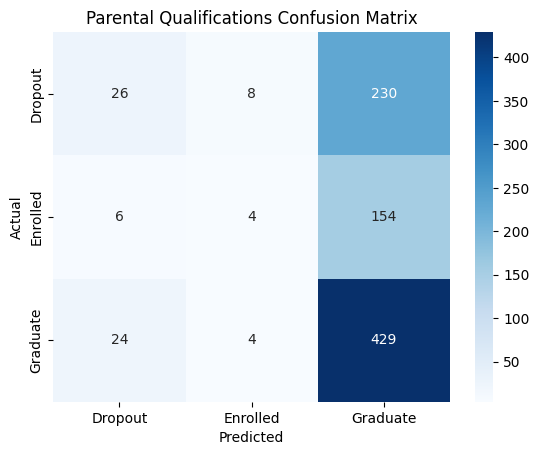

In [29]:
X = df[['Mother\'s qualification', 'Father\'s qualification']]
y = df['Target']

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Parental Qualifications Confusion Matrix')
plt.show()


This metric is a bit more accurate than nationality, however the extremely low values for Predicted Dropout indicate this prediction is not the most accurate.

## GDP, Unemployment rate, and Inflation rate

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       264
    Enrolled       0.00      0.00      0.00       164
    Graduate       0.52      1.00      0.68       457

    accuracy                           0.52       885
   macro avg       0.17      0.33      0.23       885
weighted avg       0.27      0.52      0.35       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


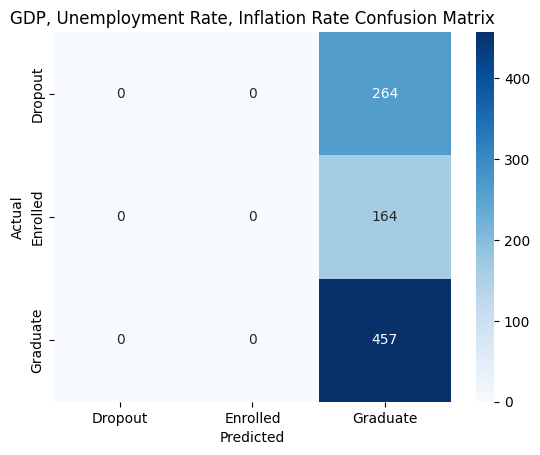

In [30]:
X = df[['Unemployment rate','Inflation rate', 'GDP']]
y = df['Target']

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GDP, Unemployment Rate, Inflation Rate Confusion Matrix')
plt.show()


The lack of data in the predicted dropout or enrolled columns strongly suggests this data is inaccurate, suggesting these factors have low influence on the data.

## Educational Special Needs

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       264
    Enrolled       0.00      0.00      0.00       164
    Graduate       0.52      1.00      0.68       457

    accuracy                           0.52       885
   macro avg       0.17      0.33      0.23       885
weighted avg       0.27      0.52      0.35       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


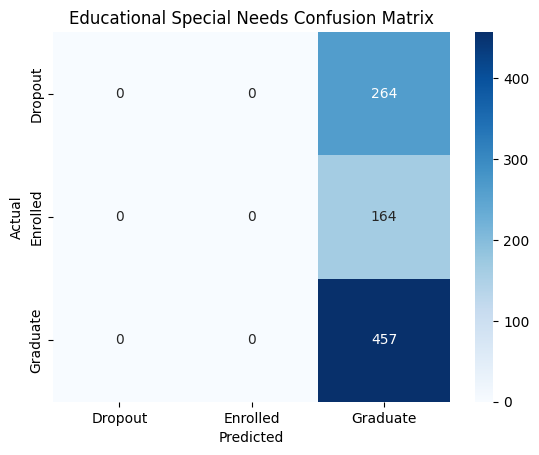

In [31]:
X = df[['Educational special needs']]
y = df['Target']

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Educational Special Needs Confusion Matrix')
plt.show()

Low impact on its own.

## Scholarship Holder

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       264
    Enrolled       0.00      0.00      0.00       164
    Graduate       0.52      1.00      0.68       457

    accuracy                           0.52       885
   macro avg       0.17      0.33      0.23       885
weighted avg       0.27      0.52      0.35       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


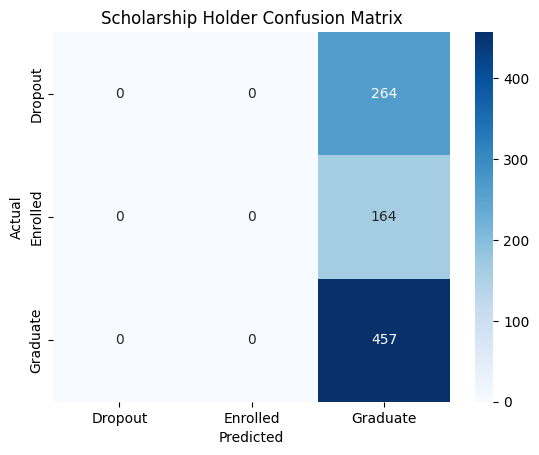

In [32]:
X = df[['Scholarship holder']]
y = df['Target']

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Scholarship Holder Confusion Matrix')
plt.show()

Little to no impact.

## International Student

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       264
    Enrolled       0.00      0.00      0.00       164
    Graduate       0.52      1.00      0.68       457

    accuracy                           0.52       885
   macro avg       0.17      0.33      0.23       885
weighted avg       0.27      0.52      0.35       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


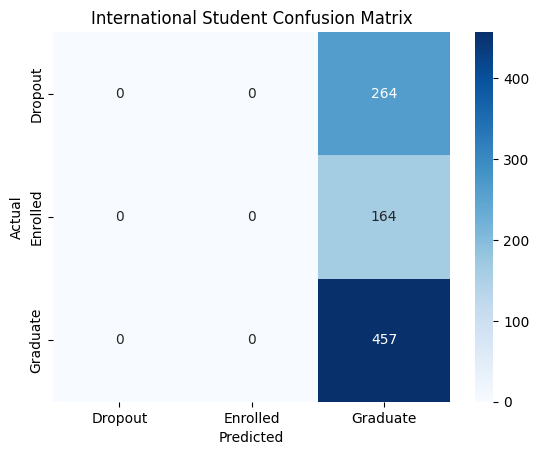

In [33]:
X = df[['International']]
y = df['Target']

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('International Student Confusion Matrix')
plt.show()

Little impact on its own.

## Personal Identity: Gender, Age at Enrollment, International, Educational Special Needs, Nationality,

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.55      0.43      0.48       264
    Enrolled       0.00      0.00      0.00       164
    Graduate       0.59      0.86      0.70       457

    accuracy                           0.57       885
   macro avg       0.38      0.43      0.39       885
weighted avg       0.47      0.57      0.50       885



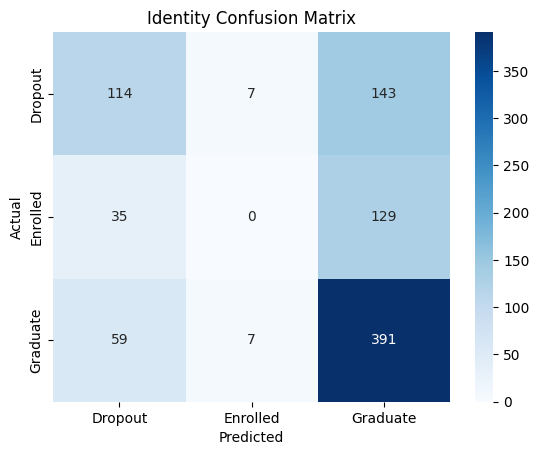

In [34]:
X = df[['Gender', 'Age at enrollment','International','Educational special needs','Nacionality']]
y = df['Target']

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Identity Confusion Matrix')
plt.show()

This has a bit more of an impact on the predictivity.

## Curricular Units 1st Semester

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.67      0.65      0.66       264
    Enrolled       0.33      0.20      0.25       164
    Graduate       0.73      0.84      0.78       457

    accuracy                           0.67       885
   macro avg       0.58      0.56      0.56       885
weighted avg       0.64      0.67      0.65       885



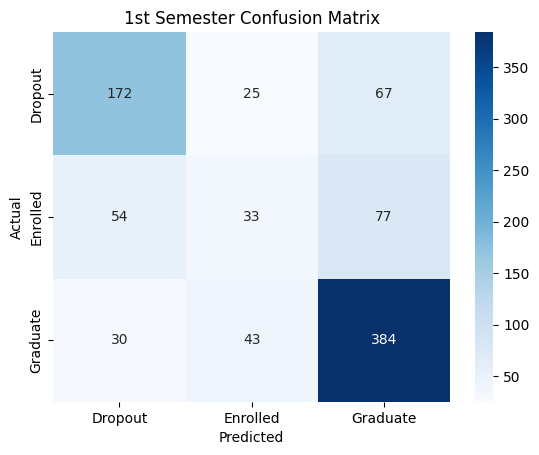

In [35]:
X = df[['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)']]
y = df['Target']

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('1st Semester Confusion Matrix')
plt.show()

This data was much more predictive, with an accuracy of 67%.

## Curricular Units 2nd Semester

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.68      0.65      0.67       264
    Enrolled       0.39      0.33      0.36       164
    Graduate       0.79      0.86      0.82       457

    accuracy                           0.70       885
   macro avg       0.62      0.61      0.61       885
weighted avg       0.68      0.70      0.69       885



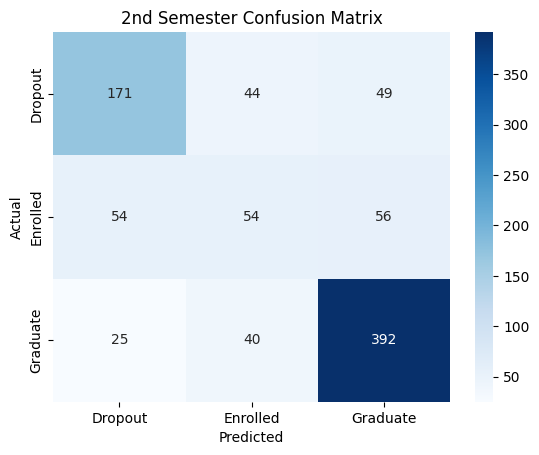

In [36]:
X = df[['Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)']]
y = df['Target']

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Convert the Target column into numerical values, which can be analyzed

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#This converts 'Dropout' to 0, 'Enrolled' to 1, 'Graduate' to 2
print(dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Initialize and train the model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('2nd Semester Confusion Matrix')
plt.show()

This was even more accurate than the 1st semester data, with an accuracy of 70%.

# Conclusion

The resulting Confusion Matrices for the unique tested variables strongly suggested that the most accurate gauge of a student's likelihood of dropping out of university comes from an analysis of their 1st and 2nd semester grades. The other factor which had a semi-tangible predictivity was the qualifications of a student's parents, however that variable was not the most accurate.